In computer science, a heuristic is a technique or method that employs practical methods, rules of thumb, or educated guesses to solve problems, often prioritizing speed and efficiency over finding the absolute optimal solution. Heuristics are especially useful when dealing with complex problems where finding the optimal solution is computationally expensive or time-consuming

In computer science, a graph is a data structure that represents relationships between objects. It consists of vertices (or nodes) and edges, where vertices represent the objects and edges represent the connections between them. Graphs are used to model various real-world scenarios, such as social networks, road maps, and the internet

Write the A* algorithm to find the shortest path from a start node to a goal node.

In [3]:
import heapq

def astar(graph, start, goal, heuristic):
    """
    A* algorithm to find shortest path from start to goal.
    
    Args:
        graph: dict where graph[node] = [(neighbor, cost), ...]
        start: starting node
        goal: goal node  
        heuristic: dict where heuristic[node] = estimated cost to goal
    
    Returns:
        path: list of nodes from start to goal, or None if no path
    """
    # Priority queue: (f_score, current_node, path)
    queue = [(heuristic[start], start, [start])]
    visited = set()
    
    while queue:
        f_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        if current == goal:
            return path
            
        visited.add(current)
        
        # Check all neighbors
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_path = path + [neighbor]
                g_score = len(path) - 1 + cost  # actual cost so far
                f_score = g_score + heuristic[neighbor]  # total estimated cost
                heapq.heappush(queue, (f_score, neighbor, new_path))
    
    return None  # No path found

# Example graph (each node connects to neighbors with costs)
graph = {
    'A': [('B', 1), ('D', 4)],
    'B': [('A', 1), ('C', 2), ('E', 5)], 
    'C': [('B', 2), ('F', 1)],
    'D': [('A', 4), ('E', 1)],
    'E': [('B', 5), ('D', 1), ('F', 3)],
    'F': [('C', 1), ('E', 3)]
}

# Heuristic: estimated distance to goal 'F'
heuristic = {
    'A': 7,  # A is far from F
    'B': 4,  # B is medium distance from F  
    'C': 1,  # C is close to F
    'D': 4,  # D is medium distance from F
    'E': 3,  # E is close to F
    'F': 0   # F is the goal
}

# Find path from A to F
path = astar(graph, 'A', 'F', heuristic)
print(f"Path from A to F: {path}")

# Test other paths
test_cases = [('A', 'C'), ('D', 'C'), ('B', 'F')]
for start, goal in test_cases:
    path = astar(graph, start, goal, heuristic)
    print(f"Path from {start} to {goal}: {path}")

Path from A to F: ['A', 'B', 'C', 'F']
Path from A to C: ['A', 'B', 'C']
Path from D to C: ['D', 'E', 'F', 'C']
Path from B to F: ['B', 'C', 'F']


---------------------------------------------------------------------------------------------------

Different heuristics

In [6]:
import heapq
import math

def astar(graph, start, goal, heuristic_func):
    """
    A* algorithm with customizable heuristic function.
    
    Args:
        graph: dict where graph[node] = [(neighbor, cost), ...]
        start: starting node
        goal: goal node  
        heuristic_func: function that takes (node, goal) and returns estimated cost
    
    Returns:
        (path, nodes_explored): path list and number of nodes explored
    """
    queue = [(heuristic_func(start, goal), 0, start, [start])]
    visited = set()
    nodes_explored = 0
    
    while queue:
        f_score, g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        nodes_explored += 1
            
        if current == goal:
            return path, nodes_explored
        
        # Check all neighbors
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_f = new_g + heuristic_func(neighbor, goal)
                new_path = path + [neighbor]
                heapq.heappush(queue, (new_f, new_g, neighbor, new_path))
    
    return None, nodes_explored

# Grid graph with coordinates
grid_graph = {
    'A': [('B', 1), ('D', 1)],  # (0,0)
    'B': [('A', 1), ('C', 1), ('E', 1)],  # (1,0)
    'C': [('B', 1), ('F', 1)],  # (2,0)
    'D': [('A', 1), ('E', 1), ('G', 1)],  # (0,1)
    'E': [('B', 1), ('D', 1), ('F', 1), ('H', 1)],  # (1,1)
    'F': [('C', 1), ('E', 1), ('I', 1)],  # (2,1)
    'G': [('D', 1), ('H', 1)],  # (0,2)
    'H': [('E', 1), ('G', 1), ('I', 1)],  # (1,2)
    'I': [('F', 1), ('H', 1)]   # (2,2)
}

# Node coordinates for distance calculations
coordinates = {
    'A': (0, 0), 'B': (1, 0), 'C': (2, 0),
    'D': (0, 1), 'E': (1, 1), 'F': (2, 1),
    'G': (0, 2), 'H': (1, 2), 'I': (2, 2)
}

# Different Heuristic Functions
def euclidean_distance(node, goal):
    """Straight-line distance (best for open spaces)"""
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def manhattan_distance(node, goal):
    """Grid distance (best for grid-like movement)"""
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return abs(x2 - x1) + abs(y2 - y1)

def chebyshev_distance(node, goal):
    """Diagonal distance (allows diagonal movement)"""
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return max(abs(x2 - x1), abs(y2 - y1))

def zero_heuristic(node, goal):
    """No heuristic (becomes Dijkstra's algorithm)"""
    return 0

def overestimate_heuristic(node, goal):
    """Overestimates distance (faster but not optimal)"""
    return manhattan_distance(node, goal) * 2

def custom_weighted_heuristic(node, goal):
    """Custom heuristic with different weights"""
    base_distance = euclidean_distance(node, goal)
    # Add penalty for going through center node 'E'
    if node == 'E':
        return base_distance + 0.5
    return base_distance

# Test all heuristics
heuristics = [
    ("Euclidean Distance", euclidean_distance),
    ("Manhattan Distance", manhattan_distance), 
    ("Chebyshev Distance", chebyshev_distance),
    ("Zero Heuristic (Dijkstra)", zero_heuristic),
    ("Overestimate Heuristic", overestimate_heuristic),
    ("Custom Weighted", custom_weighted_heuristic)
]

print("=== A* Search with Different Heuristics ===\n")
print("Finding path from A to I (top-left to bottom-right)\n")

for name, heuristic_func in heuristics:
    result = astar(grid_graph, 'A', 'I', heuristic_func)
    if result[0]:
        path, nodes_explored = result
        path_length = len(path) - 1
        print(f"{name:25} | Path: {' → '.join(path)} | Length: {path_length} | Explored: {nodes_explored}")
    else:
        print(f"{name:25} | No path found")

print("\n=== Heuristic Properties ===")
print("• Euclidean: Optimal for straight-line movement")
print("• Manhattan: Optimal for grid movement (no diagonals)")  
print("• Chebyshev: Good for movement with diagonals")
print("• Zero: Explores all paths equally (most nodes)")
print("• Overestimate: Fast but may not find optimal path")
print("• Custom: Application-specific optimizations")

# Show heuristic values for each node to goal 'I'
print(f"\n=== Heuristic Values to Goal 'I' ===")
for node in sorted(coordinates.keys()):
    print(f"Node {node}:", end="")
    for name, func in heuristics[:4]:  # Show first 4 heuristics
        value = func(node, 'I')
        print(f"  {name.split()[0]}: {value:.1f}", end="")
    print()

=== A* Search with Different Heuristics ===

Finding path from A to I (top-left to bottom-right)

Euclidean Distance        | Path: A → B → C → F → I | Length: 4 | Explored: 9
Manhattan Distance        | Path: A → B → C → F → I | Length: 4 | Explored: 9
Chebyshev Distance        | Path: A → B → C → F → I | Length: 4 | Explored: 9
Zero Heuristic (Dijkstra) | Path: A → B → C → F → I | Length: 4 | Explored: 9
Overestimate Heuristic    | Path: A → B → C → F → I | Length: 4 | Explored: 5
Custom Weighted           | Path: A → B → C → F → I | Length: 4 | Explored: 9

=== Heuristic Properties ===
• Euclidean: Optimal for straight-line movement
• Manhattan: Optimal for grid movement (no diagonals)
• Chebyshev: Good for movement with diagonals
• Zero: Explores all paths equally (most nodes)
• Overestimate: Fast but may not find optimal path
• Custom: Application-specific optimizations

=== Heuristic Values to Goal 'I' ===
Node A:  Euclidean: 2.8  Manhattan: 4.0  Chebyshev: 2.0  Zero: 0.0
Node B:

---------------------------------------------------------------------------------------------------

Implement Dijkstra’s and Greedy BestFirst Search for the same problem.
Compare the number of nodes explored and path accuracy.

In [2]:
import heapq
import math

def astar(graph, start, goal, heuristic_func):
    """A* algorithm: uses both actual cost (g) and heuristic (h)"""
    queue = [(heuristic_func(start, goal), 0, start, [start])]
    visited = set()
    nodes_explored = 0
    
    while queue:
        f_score, g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        nodes_explored += 1
            
        if current == goal:
            return path, nodes_explored, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_f = new_g + heuristic_func(neighbor, goal)
                new_path = path + [neighbor]
                heapq.heappush(queue, (new_f, new_g, neighbor, new_path))
    
    return None, nodes_explored, float('inf')

def dijkstra(graph, start, goal):
    """Dijkstra's algorithm: only uses actual cost (g), guarantees optimal path"""
    queue = [(0, start, [start])]
    visited = set()
    nodes_explored = 0
    
    while queue:
        g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        nodes_explored += 1
            
        if current == goal:
            return path, nodes_explored, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_path = path + [neighbor]
                heapq.heappush(queue, (new_g, neighbor, new_path))
    
    return None, nodes_explored, float('inf')

def greedy_best_first(graph, start, goal, heuristic_func):
    """Greedy Best-First: only uses heuristic (h), fast but not optimal"""
    queue = [(heuristic_func(start, goal), 0, start, [start])]
    visited = set()
    nodes_explored = 0
    
    while queue:
        h_score, g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        nodes_explored += 1
            
        if current == goal:
            return path, nodes_explored, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                h_score = heuristic_func(neighbor, goal)
                new_path = path + [neighbor]
                heapq.heappush(queue, (h_score, new_g, neighbor, new_path))
    
    return None, nodes_explored, float('inf')

# Test graphs
simple_graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('C', 2), ('D', 5)], 
    'C': [('D', 1)],
    'D': []
}

# Larger grid graph
grid_graph = {
    'A': [('B', 1), ('D', 1)],           # (0,0)
    'B': [('A', 1), ('C', 1), ('E', 1)], # (1,0)
    'C': [('B', 1), ('F', 1)],           # (2,0)
    'D': [('A', 1), ('E', 1), ('G', 1)], # (0,1)
    'E': [('B', 1), ('D', 1), ('F', 1), ('H', 1)], # (1,1)
    'F': [('C', 1), ('E', 1), ('I', 1)], # (2,1)
    'G': [('D', 1), ('H', 1)],           # (0,2)
    'H': [('E', 1), ('G', 1), ('I', 1)], # (1,2)
    'I': [('F', 1), ('H', 1)]            # (2,2)
}

# Complex graph with varying costs
complex_graph = {
    'A': [('B', 1), ('C', 5)],
    'B': [('D', 2), ('E', 6)],
    'C': [('F', 2)],
    'D': [('G', 1)],
    'E': [('G', 1), ('F', 1)],
    'F': [('H', 3)],
    'G': [('H', 4)],
    'H': []
}

# Node coordinates for heuristics
coordinates = {
    # Simple graph coordinates  
    'A': (0, 0), 'B': (1, 0), 'C': (1, 1), 'D': (2, 1),
    # Grid coordinates
    'E': (1, 1), 'F': (2, 1), 'G': (0, 2), 'H': (1, 2), 'I': (2, 2)
}

def manhattan_distance(node, goal):
    """Manhattan distance heuristic"""
    if node not in coordinates or goal not in coordinates:
        return 0
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return abs(x2 - x1) + abs(y2 - y1)

def euclidean_distance(node, goal):
    """Euclidean distance heuristic"""  
    if node not in coordinates or goal not in coordinates:
        return 0
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def run_comparison(graph, start, goal, graph_name, heuristic_func=manhattan_distance):
    """Compare all three algorithms on the same problem"""
    print(f"\n=== {graph_name} ({start} → {goal}) ===")
    
    algorithms = [
        ("Dijkstra's", dijkstra, None),
        ("A*", astar, heuristic_func),  
        ("Greedy Best-First", greedy_best_first, heuristic_func)
    ]
    
    results = []
    
    for name, algorithm, heuristic in algorithms:
        if heuristic:
            result = algorithm(graph, start, goal, heuristic)
        else:
            result = algorithm(graph, start, goal)
        
        path, nodes_explored, total_cost = result
        results.append((name, path, nodes_explored, total_cost))
        
        if path:
            print(f"{name:18} | Path: {' → '.join(path):12} | Cost: {total_cost:4.1f} | Explored: {nodes_explored:2d} nodes")
        else:
            print(f"{name:18} | No path found | Explored: {nodes_explored} nodes")
    
    # Analysis
    if all(r[1] for r in results):  # All found paths
        optimal_cost = min(r[3] for r in results if r[1])
        print(f"\nAnalysis:")
        for name, path, explored, cost in results:
            optimal = "✓" if cost == optimal_cost else "✗"
            efficiency = f"{explored:2d} nodes"
            print(f"  {name:18} | Optimal: {optimal} | Efficiency: {efficiency}")

# Test cases
print("=== Algorithm Comparison: A*, Dijkstra's, and Greedy Best-First ===")

# Test 1: Simple graph
run_comparison(simple_graph, 'A', 'D', "Simple Graph")

# Test 2: Grid graph  
run_comparison(grid_graph, 'A', 'I', "Grid Graph")

# Test 3: Complex graph with varying costs
complex_coords = {
    'A': (0, 0), 'B': (1, 0), 'C': (0, 1), 'D': (2, 0), 
    'E': (1, 1), 'F': (1, 2), 'G': (3, 0), 'H': (2, 2)
}
coordinates.update(complex_coords)
run_comparison(complex_graph, 'A', 'H', "Complex Graph")

print("\n=== Algorithm Characteristics ===")
print("DIJKSTRA'S ALGORITHM:")
print("  ✓ Always finds optimal path")  
print("  ✓ No heuristic needed")
print("  ✗ Explores many nodes (slower)")
print("  • Uses only actual cost from start")

print("\nA* ALGORITHM:")
print("  ✓ Finds optimal path (with admissible heuristic)")
print("  ✓ More efficient than Dijkstra's") 
print("  ✓ Balances cost and heuristic")
print("  • Uses actual cost + estimated cost to goal")

print("\nGREEDY BEST-FIRST:")
print("  ✓ Very fast (explores fewer nodes)")
print("  ✗ May not find optimal path")
print("  ✗ Can get stuck in local optima")  
print("  • Uses only estimated cost to goal")

print("\n=== When to Use Each Algorithm ===")
print("• Dijkstra's: When you need guaranteed optimal path and have no heuristic")
print("• A*: When you have a good heuristic and need optimal path")  
print("• Greedy: When speed matters more than optimality")

=== Algorithm Comparison: A*, Dijkstra's, and Greedy Best-First ===

=== Simple Graph (A → D) ===
Dijkstra's         | Path: A → B → C → D | Cost:  4.0 | Explored:  4 nodes
A*                 | Path: A → B → C → D | Cost:  4.0 | Explored:  4 nodes
Greedy Best-First  | Path: A → C → D    | Cost:  5.0 | Explored:  3 nodes

Analysis:
  Dijkstra's         | Optimal: ✓ | Efficiency:  4 nodes
  A*                 | Optimal: ✓ | Efficiency:  4 nodes
  Greedy Best-First  | Optimal: ✗ | Efficiency:  3 nodes

=== Grid Graph (A → I) ===
Dijkstra's         | Path: A → B → C → F → I | Cost:  4.0 | Explored:  9 nodes
A*                 | Path: A → B → C → F → I | Cost:  4.0 | Explored:  9 nodes
Greedy Best-First  | Path: A → D → E → F → I | Cost:  4.0 | Explored:  5 nodes

Analysis:
  Dijkstra's         | Optimal: ✓ | Efficiency:  9 nodes
  A*                 | Optimal: ✓ | Efficiency:  9 nodes
  Greedy Best-First  | Optimal: ✓ | Efficiency:  5 nodes

=== Complex Graph (A → H) ===
Dijkstra's        

Plot the explored nodes and final path using `matplotlib`.

=== Path Finding Algorithm Visualization ===

1. Grid Graph Visualization:


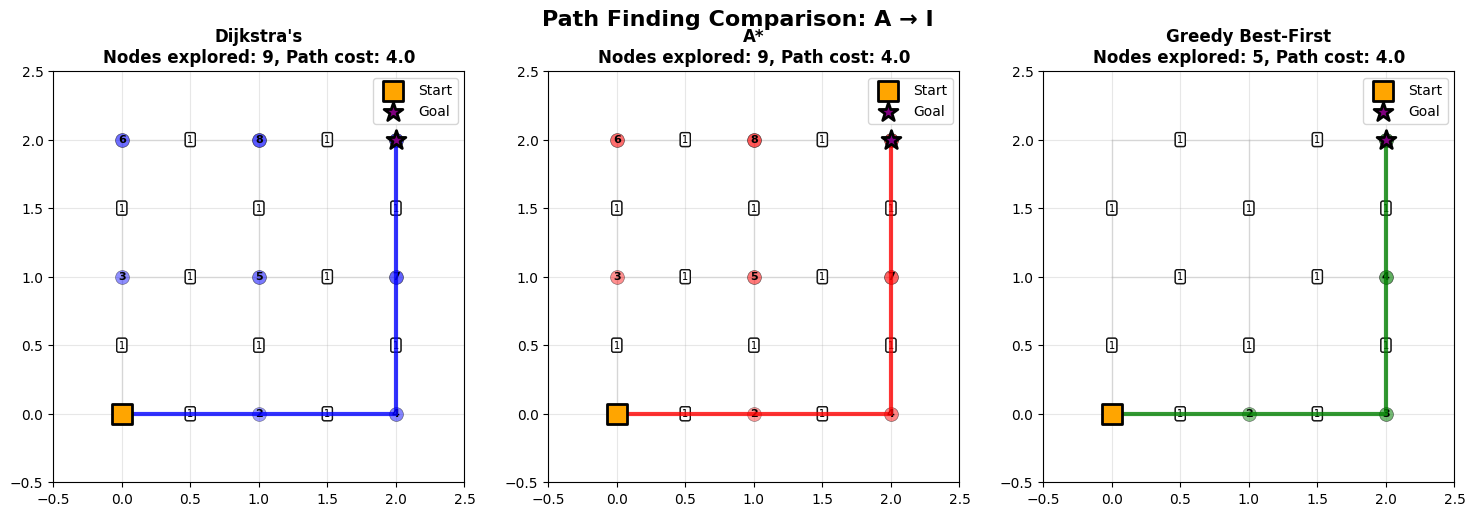


=== Results Summary (A → I) ===
Dijkstra's      | Path: A → B → C → F → I | Cost:  4.0 | Explored:  9 | Optimal: ✓
A*              | Path: A → B → C → F → I | Cost:  4.0 | Explored:  9 | Optimal: ✓
Greedy Best-First | Path: A → B → C → F → I | Cost:  4.0 | Explored:  5 | Optimal: ✓

2. Complex Graph Visualization:


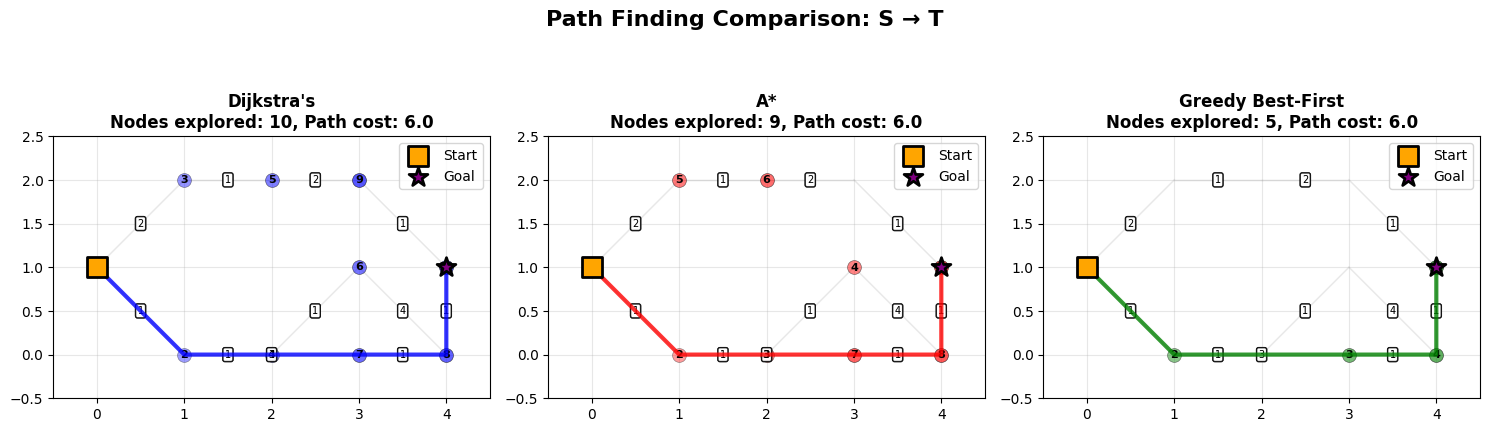


=== Results Summary (S → T) ===
Dijkstra's      | Path: S → A → D → G → T | Cost:  6.0 | Explored: 10 | Optimal: ✓
A*              | Path: S → A → D → G → T | Cost:  6.0 | Explored:  9 | Optimal: ✓
Greedy Best-First | Path: S → A → D → G → T | Cost:  6.0 | Explored:  5 | Optimal: ✓

3. Detailed A* Visualization:


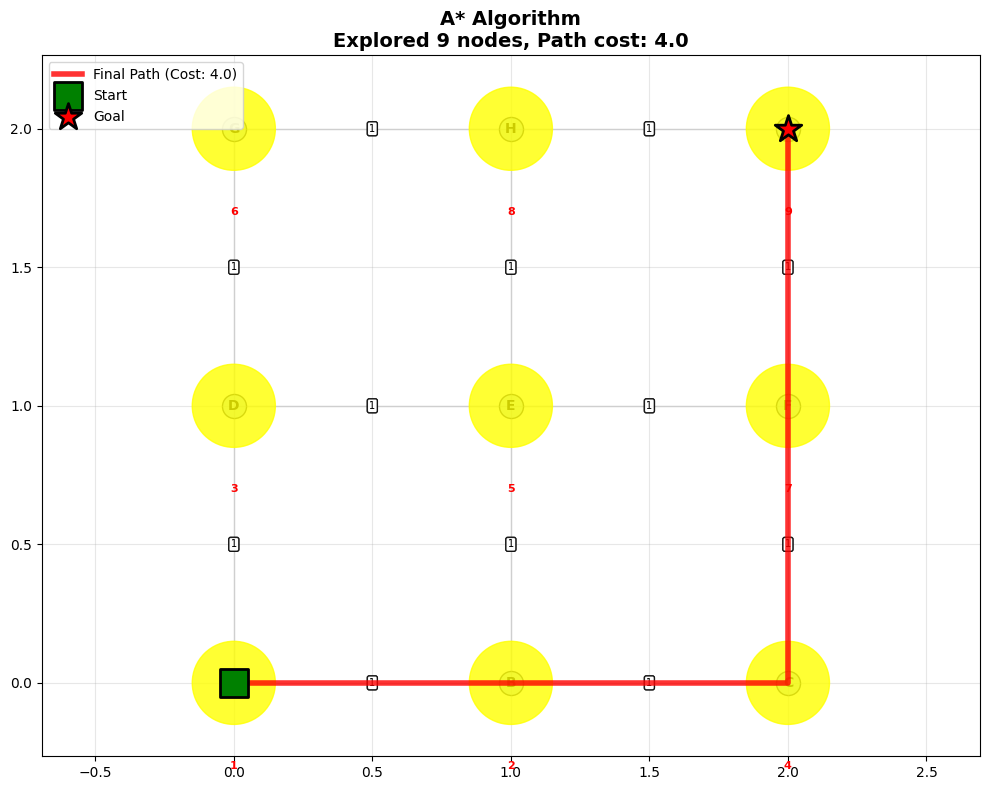

In [3]:
import heapq
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict

def astar_with_tracking(graph, coordinates, start, goal, heuristic_func):
    """A* algorithm with exploration tracking"""
    queue = [(heuristic_func(start, goal), 0, start, [start])]
    visited = set()
    explored_order = []  # Track order of exploration
    
    while queue:
        f_score, g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        explored_order.append(current)
            
        if current == goal:
            return path, explored_order, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_f = new_g + heuristic_func(neighbor, goal)
                new_path = path + [neighbor]
                heapq.heappush(queue, (new_f, new_g, neighbor, new_path))
    
    return None, explored_order, float('inf')

def dijkstra_with_tracking(graph, coordinates, start, goal):
    """Dijkstra's algorithm with exploration tracking"""
    queue = [(0, start, [start])]
    visited = set()
    explored_order = []
    
    while queue:
        g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        explored_order.append(current)
            
        if current == goal:
            return path, explored_order, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                new_path = path + [neighbor]
                heapq.heappush(queue, (new_g, neighbor, new_path))
    
    return None, explored_order, float('inf')

def greedy_with_tracking(graph, coordinates, start, goal, heuristic_func):
    """Greedy Best-First with exploration tracking"""
    queue = [(heuristic_func(start, goal), 0, start, [start])]
    visited = set()
    explored_order = []
    
    while queue:
        h_score, g_score, current, path = heapq.heappop(queue)
        
        if current in visited:
            continue
            
        visited.add(current)
        explored_order.append(current)
            
        if current == goal:
            return path, explored_order, g_score
        
        for neighbor, cost in graph.get(current, []):
            if neighbor not in visited:
                new_g = g_score + cost
                h_score = heuristic_func(neighbor, goal)
                new_path = path + [neighbor]
                heapq.heappush(queue, (h_score, new_g, neighbor, new_path))
    
    return None, explored_order, float('inf')

def plot_algorithm_comparison(graph, coordinates, start, goal, heuristic_func):
    """Plot comparison of all three algorithms"""
    
    # Run all algorithms
    algorithms = [
        ("Dijkstra's", dijkstra_with_tracking, None, 'blue'),
        ("A*", astar_with_tracking, heuristic_func, 'red'),  
        ("Greedy Best-First", greedy_with_tracking, heuristic_func, 'green')
    ]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Path Finding Comparison: {start} → {goal}', fontsize=16, fontweight='bold')
    
    results = []
    
    for i, (name, algorithm, heuristic, color) in enumerate(algorithms):
        ax = axes[i]
        
        # Run algorithm
        if heuristic:
            path, explored, cost = algorithm(graph, coordinates, start, goal, heuristic)
        else:
            path, explored, cost = algorithm(graph, coordinates, start, goal)
        
        results.append((name, path, len(explored), cost))
        
        # Plot graph structure
        plot_graph(ax, graph, coordinates, color='lightgray', alpha=0.3)
        
        # Plot explored nodes in order
        for j, node in enumerate(explored):
            x, y = coordinates[node]
            # Color nodes by exploration order (darker = explored later)
            intensity = (j + 1) / len(explored)
            ax.scatter(x, y, c=color, s=100, alpha=0.3 + 0.4 * intensity, 
                      edgecolors='black', linewidth=0.5, zorder=2)
            ax.text(x, y, str(j+1), ha='center', va='center', 
                   fontsize=8, fontweight='bold', zorder=3)
        
        # Plot final path
        if path:
            path_x = [coordinates[node][0] for node in path]
            path_y = [coordinates[node][1] for node in path]
            ax.plot(path_x, path_y, color=color, linewidth=3, alpha=0.8, zorder=4)
        
        # Highlight start and goal
        start_x, start_y = coordinates[start]
        goal_x, goal_y = coordinates[goal]
        ax.scatter(start_x, start_y, c='orange', s=200, marker='s', 
                  edgecolors='black', linewidth=2, zorder=5, label='Start')
        ax.scatter(goal_x, goal_y, c='purple', s=200, marker='*', 
                  edgecolors='black', linewidth=2, zorder=5, label='Goal')
        
        # Formatting
        ax.set_title(f'{name}\nNodes explored: {len(explored)}, Path cost: {cost:.1f}', 
                    fontweight='bold')
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper right')
        
        # Set axis limits with padding
        all_x = [coord[0] for coord in coordinates.values()]
        all_y = [coord[1] for coord in coordinates.values()]
        ax.set_xlim(min(all_x) - 0.5, max(all_x) + 0.5)
        ax.set_ylim(min(all_y) - 0.5, max(all_y) + 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\n=== Results Summary ({start} → {goal}) ===")
    optimal_cost = min(r[3] for r in results if r[1])
    for name, path, explored, cost in results:
        optimal_str = "✓" if path and cost == optimal_cost else "✗" if path else "No path"
        path_str = " → ".join(path) if path else "None"
        print(f"{name:15} | Path: {path_str:15} | Cost: {cost:4.1f} | Explored: {explored:2d} | Optimal: {optimal_str}")

def plot_graph(ax, graph, coordinates, color='black', alpha=1.0):
    """Plot the graph structure"""
    # Plot edges
    for node, neighbors in graph.items():
        x1, y1 = coordinates[node]
        for neighbor, weight in neighbors:
            x2, y2 = coordinates[neighbor]
            ax.plot([x1, x2], [y1, y2], color=color, alpha=alpha, linewidth=1, zorder=1)
            # Add edge weights
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
            ax.text(mid_x, mid_y, str(weight), fontsize=7, ha='center', va='center',
                   bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

def manhattan_distance(node, goal, coordinates):
    """Manhattan distance heuristic"""
    x1, y1 = coordinates[node]
    x2, y2 = coordinates[goal]
    return abs(x2 - x1) + abs(y2 - y1)

# Create test graph
grid_graph = {
    'A': [('B', 1), ('D', 1)],           # (0,0)
    'B': [('A', 1), ('C', 1), ('E', 1)], # (1,0)
    'C': [('B', 1), ('F', 1)],           # (2,0)
    'D': [('A', 1), ('E', 1), ('G', 1)], # (0,1)
    'E': [('B', 1), ('D', 1), ('F', 1), ('H', 1)], # (1,1)
    'F': [('C', 1), ('E', 1), ('I', 1)], # (2,1)
    'G': [('D', 1), ('H', 1)],           # (0,2)
    'H': [('E', 1), ('G', 1), ('I', 1)], # (1,2)
    'I': [('F', 1), ('H', 1)]            # (2,2)
}

grid_coordinates = {
    'A': (0, 0), 'B': (1, 0), 'C': (2, 0),
    'D': (0, 1), 'E': (1, 1), 'F': (2, 1),
    'G': (0, 2), 'H': (1, 2), 'I': (2, 2)
}

# More complex graph with obstacles
complex_graph = {
    'S': [('A', 1), ('B', 2)],           # Start
    'A': [('S', 1), ('C', 1), ('D', 3)],  
    'B': [('S', 2), ('E', 1)],           
    'C': [('A', 1), ('F', 1)],           # Obstacle makes this path expensive
    'D': [('A', 3), ('G', 1)],           
    'E': [('B', 1), ('H', 2)],           
    'F': [('C', 1), ('G', 4)],           # Expensive connection
    'G': [('D', 1), ('F', 4), ('T', 1)], 
    'H': [('E', 2), ('T', 1)],           
    'T': [('G', 1), ('H', 1)]            # Target
}

complex_coordinates = {
    'S': (0, 1), 'A': (1, 0), 'B': (1, 2),
    'C': (2, 0), 'D': (3, 0), 'E': (2, 2),
    'F': (3, 1), 'G': (4, 0), 'H': (3, 2),
    'T': (4, 1)
}

# Create heuristic functions
def grid_heuristic(node, goal):
    return manhattan_distance(node, goal, grid_coordinates)

def complex_heuristic(node, goal):
    return manhattan_distance(node, goal, complex_coordinates)

# Run visualizations
print("=== Path Finding Algorithm Visualization ===\n")

print("1. Grid Graph Visualization:")
plot_algorithm_comparison(grid_graph, grid_coordinates, 'A', 'I', grid_heuristic)

print("\n2. Complex Graph Visualization:")  
plot_algorithm_comparison(complex_graph, complex_coordinates, 'S', 'T', complex_heuristic)

# Create a single detailed visualization
def plot_single_algorithm(graph, coordinates, start, goal, algorithm_name, algorithm_func, heuristic=None):
    """Create a detailed plot for a single algorithm"""
    plt.figure(figsize=(10, 8))
    
    # Run algorithm
    if heuristic:
        path, explored, cost = algorithm_func(graph, coordinates, start, goal, heuristic)
    else:
        path, explored, cost = algorithm_func(graph, coordinates, start, goal)
    
    # Plot graph structure
    plot_graph(plt.gca(), graph, coordinates, color='lightgray', alpha=0.5)
    
    # Plot all nodes
    for node, (x, y) in coordinates.items():
        plt.scatter(x, y, c='lightblue', s=300, alpha=0.7, edgecolors='black', linewidth=1)
        plt.text(x, y, node, ha='center', va='center', fontweight='bold', fontsize=10)
    
    # Plot explored nodes with numbers
    for i, node in enumerate(explored):
        x, y = coordinates[node]
        circle = plt.Circle((x, y), 0.15, color='yellow', alpha=0.8, zorder=3)
        plt.gca().add_patch(circle)
        plt.text(x, y-0.3, str(i+1), ha='center', va='center', 
                fontsize=8, fontweight='bold', color='red')
    
    # Plot final path
    if path:
        path_x = [coordinates[node][0] for node in path]
        path_y = [coordinates[node][1] for node in path]
        plt.plot(path_x, path_y, color='red', linewidth=4, alpha=0.8, zorder=4, label=f'Final Path (Cost: {cost:.1f})')
    
    # Highlight start and goal
    start_x, start_y = coordinates[start]
    goal_x, goal_y = coordinates[goal]
    plt.scatter(start_x, start_y, c='green', s=400, marker='s', edgecolors='black', linewidth=2, zorder=5, label='Start')
    plt.scatter(goal_x, goal_y, c='red', s=400, marker='*', edgecolors='black', linewidth=2, zorder=5, label='Goal')
    
    plt.title(f'{algorithm_name} Algorithm\nExplored {len(explored)} nodes, Path cost: {cost:.1f}', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

print("\n3. Detailed A* Visualization:")
plot_single_algorithm(grid_graph, grid_coordinates, 'A', 'I', 'A*', astar_with_tracking, grid_heuristic)